In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm



In [30]:
if (0.32<0.05):
  print('Reject Null Hypothesis - One of the mean is different')
else:
  print('Not reject Null Hypothesis - no evidence that one mean is different')

Not reject Null Hypothesis - no evidence that one mean is different


# Z test - 2 independent samples

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Channel 1 - 150 customers
# channel 2 - 300 customers

n1 = 150
n2 = 300
sigma1 = 0.48
sigma2 = 0.49

#Null hypothesis - channel1 rating = channel 2
#Alternate hypothesis - chnnel1 has more mean rating than channel 2

df= pd.read_csv('/content/drive/My Drive/rating.csv')
df

Mounted at /content/drive


,channel1_rating,channel2_rating
0,3.5,3.3
1,3.7,3.3
2,3.0,2.9
3,3.8,3.7
4,3.3,4.0
...,...,...
295,NaN,3.6
296,NaN,3.5
297,NaN,4.0
298,NaN,2.8


In [3]:
def ztest_2samp(X1,X2,s1,s2,n1,n2):
  se = np.sqrt(s1**2/n1 + s2**2/n2)
  test_stat = ((X1-X2)-0)/se
  p_value = 1-norm.cdf(abs(test_stat))
  return p_value

In [4]:
df['channel1_rating'].dropna()
p_value = ztest_2samp(df['channel1_rating'].mean(), df['channel2_rating'].mean(),sigma1,sigma2,n1,n2)
p_value

if(p_value<0.05):
  print('Reject Null Hypothesis - Mean of channel1 greater than channel 2')
else:
  print('Not reject Null Hypothesis - Mean of channel1 not greater than channel 2')

Reject Null Hypothesis - Mean of channel1 greater than channel 2


# T test -2 independent samples

In [5]:
from scipy.stats import ttest_ind
df1 = pd.read_csv('/content/drive/My Drive/TVRadio.csv')
df1.head(5)

,Cable_TV,FM_Radio
0,22,25
1,8,10
2,25,29
3,22,19
4,12,13


In [6]:
test_stat,p_value = ttest_ind(df1['Cable_TV'],df1['FM_Radio'],equal_var=True,alternative='two-sided')
print(test_stat,p_value)

if(p_value<0.05):
  print('Reject Null Hypothesis - Statistical evidence to say the mean usage of tv and radio  are different')
else:
  print('Not reject Null Hypothesis - not enough Statistical evidence to say the mean of tv and radio usage are different')

-0.6063862466742147 0.5491435225558506
Not reject Null Hypothesis - not enough Statistical evidence to say the mean of tv and radio usage are different


# TTest - 2 idenependent sample , std deviation -unequal

In [7]:
df2 = pd.read_csv('/content/drive/My Drive/SATVerbal1.csv')
df2.head(5)

,College,High School
0,485,489.0
1,534,507.0
2,650,447.0
3,554,515.0
4,550,470.0


In [8]:
#Null hypothesis
#Sat scores of students with parents having bachelor degree is equal to
#Sat scores of students with parents not having bachelor degree

#Alternate hypothesis
#Sat scores of students with parents having bachelor degree is higher than
#Sat scores of students with parents not having bachelor degree

#alpha -0.05

#test - ttest_ind, std dev -unkown, std dev - unequal

test_stat,p_value = ttest_ind(df2['College'],df2['High School'].dropna(),equal_var=False,alternative='greater')
print(test_stat,p_value)

2.5926771486236686 0.008034956026490195


-1.9599639845400545 1.959963984540054


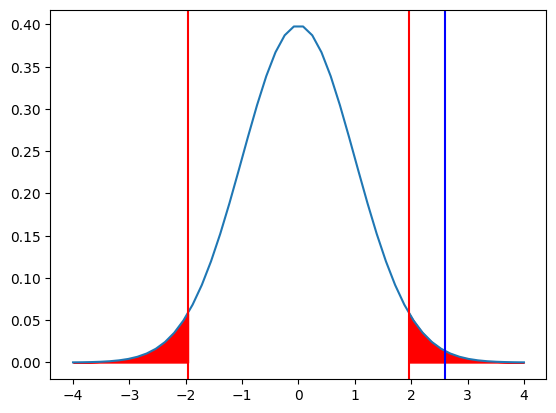

In [9]:
alpha = 0.05
critical_p1 = norm.ppf(alpha/2)
critical_p2 = norm.ppf(1-(alpha/2))
print(critical_p1,critical_p2)
f,ax = plt.subplots()
x1 = np.linspace(-4,4,50)
plt.plot(x1,norm.pdf(x1))
plt.axvline(test_stat,color='blue')
plt.axvline(critical_p1,color='red')
plt.axvline(critical_p2,color='red')
x2 = np.linspace(-4,critical_p1,50)
plt.fill_between(x2,norm.pdf(x2),color='red')
x3 = np.linspace(critical_p2,4,50)
plt.fill_between(x3,norm.pdf(x3),color='red')
plt.show()

In [30]:
if (p_value<0.05):
  print('Reject Null Hypothesis - No evidence that  Sat scores of students with parents having bachelor degree is not higher than those with parents not having bachelor degree')
else:
  print('Not reject Null Hypothesis - No evidence that Sat scores of students with parents having bachelor degree is higher than those with parents not having bachelor degree')

Reject Null Hypothesis - No evidence that  Sat scores of students with parents having bachelor degree is not higher than those with parents not having bachelor degree


# One tail Proportions Test

In [18]:
from statsmodels.stats.proportion import proportions_ztest
#Null hypothesis : democratic party will have chance of P<=0.5 for winning
#Alternate hypothesis : democratic party will not have chance of P>0.5 for winning

#Perfrom one proportion z test
test_stat,p_value = proportions_ztest(55,90,value=0.5,alternative='larger')
print(test_stat,p_value)

2.1622499104693422 0.015299459166761464


1.6448536269514722


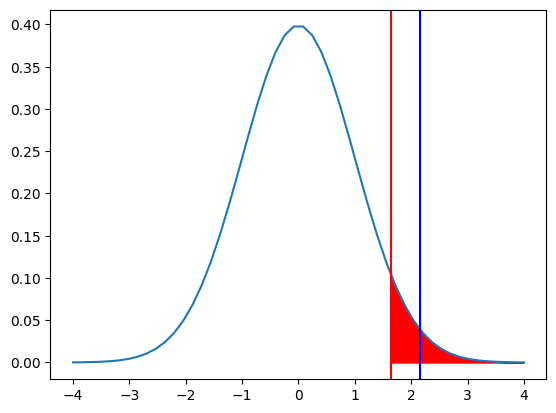

In [19]:
alpha = 0.05
critical_p1 = norm.ppf(1-alpha)
print(critical_p1)
f,ax = plt.subplots()
x1 = np.linspace(-4,4,50)
plt.plot(x1,norm.pdf(x1))
plt.axvline(test_stat,color='blue')
plt.axvline(critical_p1,color='red')
x3 = np.linspace(critical_p1,4,50)
plt.fill_between(x3,norm.pdf(x3),color='red')
plt.show()

In [ ]:
#when p = 54
#test stat value is 2.1 and critical value is 1.6(2.1>1.6, lies in the rejection zone)
#p value is 0.015 which is less than alpha(0.05)
#hence null hypothesis is rejected

# Two sample proportions test

In [22]:
from statsmodels.stats.proportion import proportions_ztest
#Data Collection
p1=20
n1=200
p2=25
n2=400

#Setting up hypothesis
#Null hypotheis:
#probability of line 1 = probability of line 2
#Alternative hypothesis
#probability of line 1 # probability of line 2

#setting up alpha value
alpha =0.05

#choosing test
#comparing 1 indp population proportion against the other
#random independent samples

#assumptions of test
#n1p1 = 20 n2p2 = 80
#n1(1-p1) = 25 n2(1-p2) = 75
#As all above values are more than 10, by CLT binomial distribution will approximate to normal distribution

#performing the test
test_stat,p_value = proportions_ztest([p1,p2],[n1,n2],alternative='two-sided')
print(test_stat,p_value)

#Drawing conclusion
if (p_value<alpha):
  print('Null hypothesis is rejected - probability of line 1 # probability of line 2 ')
else:
  print('Null hypothesis is not rejected - probability of line 1 = probability of line 2')

1.6439898730535731 0.10017829422626796
Null hypothesis is not rejected - probability of line 1 = probability of line 2


Chi-2 Test

In [24]:
from scipy.stats import chi2_contingency
#Data Collection
df5 = pd.read_csv('/content/drive/My Drive/Beverage.csv')
df5.head(5)


#Setting up hypothesis
#Null hypotheis:
#The variable are independent
#Alternative hypothesis
#The variable are not independent

#setting up alpha value
alpha =0.05

#choosing test
#categorical variable
#sample size in each column >5
#random independent samples

#assumptions of test
#n1p1 = 20 n2p2 = 80
#n1(1-p1) = 25 n2(1-p2) = 75
#As all above values are more than 10, by CLT binomial distribution will approximate to normal distribution

#performing the test
chi,p_value,df,expected = chi2_contingency(df5.drop(['Age'],axis=1))
print(chi,p_value,df,expected)

#Drawing conclusion
if (p_value<alpha):
  print('Null hypothesis is rejected - The variable are not independent ')
else:
  print('Null hypothesis is not rejected - The variable are independent')

49.15840930376024 5.410957050304089e-10 4 [[39.52302632 62.17105263 33.30592105]
 [29.27631579 46.05263158 24.67105263]
 [20.20065789 31.77631579 17.02302632]]
Null hypothesis is rejected - The variable are not independent 


# Oneway Anova Test

In [5]:
from scipy.stats import f_oneway
from google.colab import drive
drive.mount('/content/drive')

df_a = pd.read_csv('/content/drive/My Drive/AOVData.csv')
df_a.head(5)

Mounted at /content/drive


,Car_ID,manufacturer,fuel_type,co_emissions
0,1,Audi,Petrol,441.55
1,2,BMW,E85,376.47
2,3,BMW,E85,414.12
3,4,BMW,E85,351.41
4,5,Volvo,E85,284.59


In [7]:
#To perform oneway annova let us check if the carbon emission follows normal distibuion

#Null hypothesis
#data follows normal distribution
#Alternate
#data does not follow normal distribution

from scipy.stats import shapiro
test_stat,p_value = shapiro(df_a['co_emissions'])
print(test_stat,p_value)

if (p_value<0.05):
  print('Null hypothesis is rejected - data does not follow normal distribution')
else:
  print('Null hypothesis is not rejected - data follows normal distribution')


0.997071002684025 0.49709524943766514
Null hypothesis is not rejected - data follows normal distribution


In [24]:
#We have to ensure the var of all 3 fuel type are equal

from scipy.stats import levene

test_static,p_value = levene(df_a['co_emissions'][df_a['fuel_type']=='Petrol'],df_a['co_emissions'][df_a['fuel_type']=='E85'],df_a['co_emissions'][df_a['fuel_type']=='LPG'])
print(test_static,p_value)

if (p_value<0.05):
  print('Null hypothesis is rejected - variance of all 3 fuel type are not equal')
else:
  print('Null hypothesis is not rejected - variance of all 3 fuel type are equal')

1.6432552897712633 0.19437768490117
Null hypothesis is not rejected - variance of all 3 fuel type are equal


In [25]:


from scipy.stats import f_oneway
#Data collection
fuel_petrol = df_a['co_emissions'][df_a['fuel_type']=='Petrol']
fuel_e85 = df_a['co_emissions'][df_a['fuel_type']=='E85']
fuel_lpg = df_a['co_emissions'][df_a['fuel_type']=='LPG']

#Framing hypothesis
#Null hypothesis - mean value of carbon emission is same across all fuel type
#Alternate - mean value of carbon emission is not same across all fuel type

#setting alpha value
alpha =0.05

#choosing the teststatic
#choosing f_oneway anova

#Satisfying the assumption
#since carbon emission is a normal distrution and the variance across fuel types are same we
#perform one-way anova test

#performing test
test_static,p_value = f_oneway(fuel_petrol,fuel_e85,fuel_lpg)
print(test_static,p_value)

#drawing conclusion
if (p_value<alpha):
  print('Null hypothesis is rejected - mean value of carbon emission is not same across all fuel type')
else:
  print('Null hypothesis is not rejected - mean value of carbon emission is same across all fuel type')

11.97665207346097 8.274439764368132e-06
Null hypothesis is rejected - mean value of carbon emission is not same across all fuel type


-1.9599639845400545 1.959963984540054


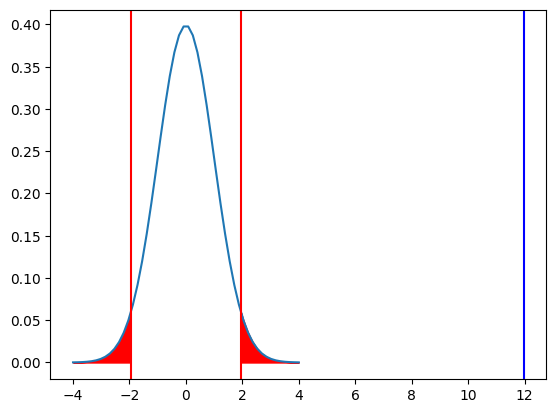

In [27]:
from scipy.stats import norm

alpha = 0.05
critical_p1 = norm.ppf(alpha/2)
critical_p2 = norm.ppf(1-(alpha/2))
print(critical_p1,critical_p2)

f,ax = plt.subplots()
x1 = np.linspace(-4,4,50)
plt.plot(x1,norm.pdf(x1))
plt.axvline(test_static,color='blue')
plt.axvline(critical_p1,color='red')
plt.axvline(critical_p2,color='red')
x2 = np.linspace(-4,critical_p1,50)
plt.fill_between(x2,norm.pdf(x2),color='red')
x3 = np.linspace(critical_p2,4,50)
plt.fill_between(x3,norm.pdf(x3),color='red')
plt.show()
